In [1]:
import datetime
import os
import sys

import pandas as pd

from py_kd_data_common_proj.ds_utils.ds_common_util import init_log_config, init_pandas_setting
from py_kd_data_common_proj.ds_utils.ds_date_util import format_date, delta_time, make_stat_week_day_list

### 出租车上下车信息
    measure: 
        total_amount, tip_amount, tolls_amount, fare_amount, passenger_count
    dim:
        tpep_pickup_datetime: 2020-12-01 00:07:13
        tpep_dropoff_datetime: 2020-12-01 00:18:12
        PULocationID: 138
        DOLocationID: 263

In [2]:
taxi_activity_file = "/Users/qian.jiang/workspace4py/JamesPython/_data/kylin_demo/data/trip_data_2018-2021/2020/2020-12.csv"

taxi_df = pd.read_csv(taxi_activity_file, low_memory=False)

taxi_df['pickup_date'] = taxi_df['tpep_pickup_datetime'].map(
    lambda x: str(format_date(x, new_pattern="%Y-%m-%d")))

taxi_df['dropoff_date'] = taxi_df['tpep_dropoff_datetime'].map(
    lambda x: str(format_date(x, new_pattern="%Y-%m-%d")))

taxi_df['elapse_time'] = taxi_df.apply(lambda x: str(delta_time(x['tpep_pickup_datetime'], x['tpep_dropoff_datetime'])),
                                       axis=1)

taxi_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date,dropoff_date,elapse_time
0,1.0,2020-12-01 00:07:13,2020-12-01 00:18:12,1.0,7.60,1.0,N,138,263,1.0,...,3.0,0.5,2.50,6.12,0.3,33.92,2.5,2020-12-01,2020-12-01,0:10:59
1,1.0,2020-12-01 00:41:19,2020-12-01 00:49:45,1.0,1.60,1.0,N,140,263,1.0,...,3.0,0.5,2.95,0.00,0.3,14.75,2.5,2020-12-01,2020-12-01,0:08:26
2,2.0,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,132,164,1.0,...,0.0,0.5,2.50,6.12,0.3,63.92,2.5,2020-12-01,2020-12-01,0:26:55
3,2.0,2020-12-01 00:02:15,2020-12-01 00:13:09,1.0,4.16,1.0,N,238,48,1.0,...,0.5,0.5,1.00,0.00,0.3,18.80,2.5,2020-12-01,2020-12-01,0:10:54
4,2.0,2020-12-01 00:37:42,2020-12-01 00:45:11,1.0,2.22,1.0,N,238,41,2.0,...,0.5,0.5,0.00,0.00,0.3,9.80,0.0,2020-12-01,2020-12-01,0:07:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461892,NaN,2020-12-31 23:44:35,2021-01-01 00:01:22,NaN,9.22,NaN,NaN,143,20,NaN,...,0.0,0.5,8.16,0.00,0.3,43.95,2.5,2020-12-31,2021-01-01,0:16:47
1461893,NaN,2020-12-31 23:41:36,2020-12-31 23:50:32,NaN,4.79,NaN,NaN,4,262,NaN,...,0.0,0.5,3.65,0.00,0.3,20.17,2.5,2020-12-31,2020-12-31,0:08:56
1461894,NaN,2020-12-31 23:01:17,2020-12-31 23:40:37,NaN,28.00,NaN,NaN,210,78,NaN,...,0.0,0.5,2.75,6.12,0.3,78.98,0.0,2020-12-31,2020-12-31,0:39:20
1461895,NaN,2020-12-31 23:31:29,2020-12-31 23:44:22,NaN,7.08,NaN,NaN,148,129,NaN,...,0.0,0.5,2.75,0.00,0.3,39.50,0.0,2020-12-31,2020-12-31,0:12:53


### 出租车活动区域
    dim：
        LocationID: 138

In [3]:
taxi_zone_file = "/Users/qian.jiang/workspace4py/JamesPython/_data/kylin_demo/data/taxi_zone/taxi_zone_lookup.csv"

taxi_zone_df = pd.read_csv(taxi_zone_file, low_memory=False)

taxi_zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


### 连接出租车上下车活动信息与活动区域


In [4]:
taxi_pickup_df = taxi_df.join(taxi_zone_df.set_index('LocationID'), how='left', on='PULocationID',
                              lsuffix='_L',
                              rsuffix="_R")

taxi_pickup_df = taxi_pickup_df.join(taxi_zone_df.set_index('LocationID'), how='left', on='DOLocationID',
                                     lsuffix='_PU',
                                     rsuffix="_DO")

taxi_pickup_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,pickup_date,dropoff_date,elapse_time,Borough_PU,Zone_PU,service_zone_PU,Borough_DO,Zone_DO,service_zone_DO
0,1.0,2020-12-01 00:07:13,2020-12-01 00:18:12,1.0,7.60,1.0,N,138,263,1.0,...,2.5,2020-12-01,2020-12-01,0:10:59,Queens,LaGuardia Airport,Airports,Manhattan,Yorkville West,Yellow Zone
1,1.0,2020-12-01 00:41:19,2020-12-01 00:49:45,1.0,1.60,1.0,N,140,263,1.0,...,2.5,2020-12-01,2020-12-01,0:08:26,Manhattan,Lenox Hill East,Yellow Zone,Manhattan,Yorkville West,Yellow Zone
2,2.0,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,132,164,1.0,...,2.5,2020-12-01,2020-12-01,0:26:55,Queens,JFK Airport,Airports,Manhattan,Midtown South,Yellow Zone
3,2.0,2020-12-01 00:02:15,2020-12-01 00:13:09,1.0,4.16,1.0,N,238,48,1.0,...,2.5,2020-12-01,2020-12-01,0:10:54,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Clinton East,Yellow Zone
4,2.0,2020-12-01 00:37:42,2020-12-01 00:45:11,1.0,2.22,1.0,N,238,41,2.0,...,0.0,2020-12-01,2020-12-01,0:07:29,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461892,NaN,2020-12-31 23:44:35,2021-01-01 00:01:22,NaN,9.22,NaN,NaN,143,20,NaN,...,2.5,2020-12-31,2021-01-01,0:16:47,Manhattan,Lincoln Square West,Yellow Zone,Bronx,Belmont,Boro Zone
1461893,NaN,2020-12-31 23:41:36,2020-12-31 23:50:32,NaN,4.79,NaN,NaN,4,262,NaN,...,2.5,2020-12-31,2020-12-31,0:08:56,Manhattan,Alphabet City,Yellow Zone,Manhattan,Yorkville East,Yellow Zone
1461894,NaN,2020-12-31 23:01:17,2020-12-31 23:40:37,NaN,28.00,NaN,NaN,210,78,NaN,...,0.0,2020-12-31,2020-12-31,0:39:20,Brooklyn,Sheepshead Bay,Boro Zone,Bronx,East Tremont,Boro Zone
1461895,NaN,2020-12-31 23:31:29,2020-12-31 23:44:22,NaN,7.08,NaN,NaN,148,129,NaN,...,0.0,2020-12-31,2020-12-31,0:12:53,Manhattan,Lower East Side,Yellow Zone,Queens,Jackson Heights,Boro Zone


In [5]:
taxi_pickup_df.reindex(range(len(taxi_pickup_df)))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,pickup_date,dropoff_date,elapse_time,Borough_PU,Zone_PU,service_zone_PU,Borough_DO,Zone_DO,service_zone_DO
0,1.0,2020-12-01 00:07:13,2020-12-01 00:18:12,1.0,7.60,1.0,N,138,263,1.0,...,2.5,2020-12-01,2020-12-01,0:10:59,Queens,LaGuardia Airport,Airports,Manhattan,Yorkville West,Yellow Zone
1,1.0,2020-12-01 00:41:19,2020-12-01 00:49:45,1.0,1.60,1.0,N,140,263,1.0,...,2.5,2020-12-01,2020-12-01,0:08:26,Manhattan,Lenox Hill East,Yellow Zone,Manhattan,Yorkville West,Yellow Zone
2,2.0,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,132,164,1.0,...,2.5,2020-12-01,2020-12-01,0:26:55,Queens,JFK Airport,Airports,Manhattan,Midtown South,Yellow Zone
3,2.0,2020-12-01 00:02:15,2020-12-01 00:13:09,1.0,4.16,1.0,N,238,48,1.0,...,2.5,2020-12-01,2020-12-01,0:10:54,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Clinton East,Yellow Zone
4,2.0,2020-12-01 00:37:42,2020-12-01 00:45:11,1.0,2.22,1.0,N,238,41,2.0,...,0.0,2020-12-01,2020-12-01,0:07:29,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461892,NaN,2020-12-31 23:44:35,2021-01-01 00:01:22,NaN,9.22,NaN,NaN,143,20,NaN,...,2.5,2020-12-31,2021-01-01,0:16:47,Manhattan,Lincoln Square West,Yellow Zone,Bronx,Belmont,Boro Zone
1461893,NaN,2020-12-31 23:41:36,2020-12-31 23:50:32,NaN,4.79,NaN,NaN,4,262,NaN,...,2.5,2020-12-31,2020-12-31,0:08:56,Manhattan,Alphabet City,Yellow Zone,Manhattan,Yorkville East,Yellow Zone
1461894,NaN,2020-12-31 23:01:17,2020-12-31 23:40:37,NaN,28.00,NaN,NaN,210,78,NaN,...,0.0,2020-12-31,2020-12-31,0:39:20,Brooklyn,Sheepshead Bay,Boro Zone,Bronx,East Tremont,Boro Zone
1461895,NaN,2020-12-31 23:31:29,2020-12-31 23:44:22,NaN,7.08,NaN,NaN,148,129,NaN,...,0.0,2020-12-31,2020-12-31,0:12:53,Manhattan,Lower East Side,Yellow Zone,Queens,Jackson Heights,Boro Zone


### 选取第 9999 行

In [6]:
taxi_pickup_df.iloc[9999]

VendorID                                     2.0
tpep_pickup_datetime         2020-12-01 10:11:41
tpep_dropoff_datetime        2020-12-01 10:20:01
passenger_count                              1.0
trip_distance                               2.16
RatecodeID                                   1.0
store_and_fwd_flag                             N
PULocationID                                 261
DOLocationID                                 113
payment_type                                 1.0
fare_amount                                  8.5
extra                                        0.0
mta_tax                                      0.5
tip_amount                                   2.0
tolls_amount                                 0.0
improvement_surcharge                        0.3
total_amount                                13.8
congestion_surcharge                         2.5
pickup_date                           2020-12-01
dropoff_date                          2020-12-01
elapse_time         

### 选取第 9999 行的指定列

In [7]:
taxi_pickup_df.loc[
    9999, ['pickup_date', 'total_amount', 'trip_distance', 'passenger_count', 'elapse_time', 'tpep_pickup_datetime',
           'pickup_date', 'Zone_PU', 'tpep_dropoff_datetime', 'dropoff_date', 'Zone_DO']]

pickup_date                           2020-12-01
total_amount                                13.8
trip_distance                               2.16
passenger_count                              1.0
elapse_time                              0:08:20
tpep_pickup_datetime         2020-12-01 10:11:41
pickup_date                           2020-12-01
Zone_PU                       World Trade Center
tpep_dropoff_datetime        2020-12-01 10:20:01
dropoff_date                          2020-12-01
Zone_DO                  Greenwich Village North
Name: 9999, dtype: object

In [8]:
taxi_pickup_df.loc[:,
['pickup_date', 'total_amount', 'trip_distance', 'passenger_count', 'elapse_time', 'tpep_pickup_datetime',
 'pickup_date', 'Zone_PU', 'tpep_dropoff_datetime', 'dropoff_date', 'Zone_DO']]

,pickup_date,total_amount,trip_distance,passenger_count,elapse_time,tpep_pickup_datetime,pickup_date,Zone_PU,tpep_dropoff_datetime,dropoff_date,Zone_DO
0,2020-12-01,33.92,7.60,1.0,0:10:59,2020-12-01 00:07:13,2020-12-01,LaGuardia Airport,2020-12-01 00:18:12,2020-12-01,Yorkville West
1,2020-12-01,14.75,1.60,1.0,0:08:26,2020-12-01 00:41:19,2020-12-01,Lenox Hill East,2020-12-01 00:49:45,2020-12-01,Yorkville West
2,2020-12-01,63.92,16.74,1.0,0:26:55,2020-12-01 00:33:40,2020-12-01,JFK Airport,2020-12-01 01:00:35,2020-12-01,Midtown South
3,2020-12-01,18.80,4.16,1.0,0:10:54,2020-12-01 00:02:15,2020-12-01,Upper West Side North,2020-12-01 00:13:09,2020-12-01,Clinton East
4,2020-12-01,9.80,2.22,1.0,0:07:29,2020-12-01 00:37:42,2020-12-01,Upper West Side North,2020-12-01 00:45:11,2020-12-01,Central Harlem
...,...,...,...,...,...,...,...,...,...,...,...
1461892,2020-12-31,43.95,9.22,NaN,0:16:47,2020-12-31 23:44:35,2020-12-31,Lincoln Square West,2021-01-01 00:01:22,2021-01-01,Belmont
1461893,2020-12-31,20.17,4.79,NaN,0:08:56,2020-12-31 23:41:36,2020-12-31,Alphabet City,2020-12-31 23:50:32,2020-12-31,Yorkville East
1461894,2020-12-31,78.98,28.00,NaN,0:39:20,2020-12-31 23:01:17,2020-12-31,Sheepshead Bay,2020-12-31 23:40:37,2020-12-31,East Tremont
1461895,2020-12-31,39.50,7.08,NaN,0:12:53,2020-12-31 23:31:29,2020-12-31,Lower East Side,2020-12-31 23:44:22,2020-12-31,Jackson Heights


### 日期维表
    day_start date,
    month_start date,
    quarter_start date,
    year_start date,
    month_en string,
    day_of_year int,
    week_of_year int

In [9]:
calendar_file = "/Users/qian.jiang/workspace4py/JamesPython/_data/kylin_demo/data/lookup_calendar/kylin_cal.csv"

cal_df = pd.read_csv(calendar_file, low_memory=False)

cal_df

,day_start,month_start,quarter_start,year_start,month_en,day_of_year,week_of_year
0,2010-01-01,2010-01-01,2010-01-01,2010-01-01,Jan,2,1
1,2010-01-02,2010-01-01,2010-01-01,2010-01-01,Jan,2,1
2,2010-01-03,2010-01-01,2010-01-01,2010-01-01,Jan,3,1
3,2010-01-04,2010-01-01,2010-01-01,2010-01-01,Jan,4,1
4,2010-01-05,2010-01-01,2010-01-01,2010-01-01,Jan,5,1
...,...,...,...,...,...,...,...
4738,2022-12-27,2022-12-01,2022-10-01,2022-01-01,Dec,361,52
4739,2022-12-28,2022-12-01,2022-10-01,2022-01-01,Dec,362,52
4740,2022-12-29,2022-12-01,2022-10-01,2022-01-01,Dec,363,52
4741,2022-12-30,2022-12-01,2022-10-01,2022-01-01,Dec,364,53


### 连接出租车上下车信息：上下车信息、区域、日期

In [10]:
taxi_pickup_df = taxi_pickup_df.join(cal_df.set_index('day_start'), how='left', on='pickup_date',
                                     lsuffix='_L',
                                     rsuffix="_R")

taxi_pickup_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,service_zone_PU,Borough_DO,Zone_DO,service_zone_DO,month_start,quarter_start,year_start,month_en,day_of_year,week_of_year
0,1.0,2020-12-01 00:07:13,2020-12-01 00:18:12,1.0,7.60,1.0,N,138,263,1.0,...,Airports,Manhattan,Yorkville West,Yellow Zone,2020-12-01,2020-10-01,2020-01-01,Dec,336.0,49.0
1,1.0,2020-12-01 00:41:19,2020-12-01 00:49:45,1.0,1.60,1.0,N,140,263,1.0,...,Yellow Zone,Manhattan,Yorkville West,Yellow Zone,2020-12-01,2020-10-01,2020-01-01,Dec,336.0,49.0
2,2.0,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,132,164,1.0,...,Airports,Manhattan,Midtown South,Yellow Zone,2020-12-01,2020-10-01,2020-01-01,Dec,336.0,49.0
3,2.0,2020-12-01 00:02:15,2020-12-01 00:13:09,1.0,4.16,1.0,N,238,48,1.0,...,Yellow Zone,Manhattan,Clinton East,Yellow Zone,2020-12-01,2020-10-01,2020-01-01,Dec,336.0,49.0
4,2.0,2020-12-01 00:37:42,2020-12-01 00:45:11,1.0,2.22,1.0,N,238,41,2.0,...,Yellow Zone,Manhattan,Central Harlem,Boro Zone,2020-12-01,2020-10-01,2020-01-01,Dec,336.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461892,NaN,2020-12-31 23:44:35,2021-01-01 00:01:22,NaN,9.22,NaN,NaN,143,20,NaN,...,Yellow Zone,Bronx,Belmont,Boro Zone,2020-12-01,2020-10-01,2020-01-01,Dec,366.0,53.0
1461893,NaN,2020-12-31 23:41:36,2020-12-31 23:50:32,NaN,4.79,NaN,NaN,4,262,NaN,...,Yellow Zone,Manhattan,Yorkville East,Yellow Zone,2020-12-01,2020-10-01,2020-01-01,Dec,366.0,53.0
1461894,NaN,2020-12-31 23:01:17,2020-12-31 23:40:37,NaN,28.00,NaN,NaN,210,78,NaN,...,Boro Zone,Bronx,East Tremont,Boro Zone,2020-12-01,2020-10-01,2020-01-01,Dec,366.0,53.0
1461895,NaN,2020-12-31 23:31:29,2020-12-31 23:44:22,NaN,7.08,NaN,NaN,148,129,NaN,...,Yellow Zone,Queens,Jackson Heights,Boro Zone,2020-12-01,2020-10-01,2020-01-01,Dec,366.0,53.0


In [11]:
### 按照日期排序

In [12]:
taxi_pickup_df = taxi_pickup_df.sort_values(axis=0, by=['pickup_date'], ascending=True)

taxi_pickup_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,service_zone_PU,Borough_DO,Zone_DO,service_zone_DO,month_start,quarter_start,year_start,month_en,day_of_year,week_of_year
353944,2.0,2003-03-26 21:07:28,2003-03-27 13:30:46,1.0,0.00,1.0,N,193,193,1.0,...,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone,NaN,NaN,NaN,NaN,NaN,NaN
267910,2.0,2008-12-31 23:08:07,2008-12-31 23:08:12,1.0,0.00,1.0,N,193,193,2.0,...,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone,NaN,NaN,NaN,NaN,NaN,NaN
571129,2.0,2009-01-01 02:26:49,2009-01-01 14:37:23,1.0,0.00,1.0,N,7,7,2.0,...,Boro Zone,Queens,Astoria,Boro Zone,NaN,NaN,NaN,NaN,NaN,NaN
1047200,2.0,2009-01-01 18:33:44,2009-01-01 18:34:54,1.0,0.00,1.0,N,193,193,2.0,...,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone,NaN,NaN,NaN,NaN,NaN,NaN
1160098,2.0,2009-01-01 00:46:10,2009-01-01 01:16:52,2.0,9.36,1.0,N,132,39,2.0,...,Airports,Brooklyn,Canarsie,Boro Zone,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011123,2.0,2021-04-28 18:28:11,2021-04-28 18:40:24,1.0,3.49,1.0,N,140,234,1.0,...,Yellow Zone,Manhattan,Union Sq,Yellow Zone,2021-04-01,2021-04-01,2021-01-01,Apr,118.0,18.0
1011124,2.0,2021-04-28 18:43:30,2021-04-29 02:02:52,1.0,5.91,1.0,N,170,87,2.0,...,Yellow Zone,Manhattan,Financial District North,Yellow Zone,2021-04-01,2021-04-01,2021-01-01,Apr,118.0,18.0
1011125,2.0,2021-05-20 02:07:54,2021-05-20 02:13:51,1.0,0.98,1.0,N,261,13,1.0,...,Yellow Zone,Manhattan,Battery Park City,Yellow Zone,2021-05-01,2021-04-01,2021-01-01,May,140.0,21.0
1015663,2.0,2021-05-20 02:40:50,2021-05-20 02:47:10,1.0,1.14,1.0,N,13,88,2.0,...,Yellow Zone,Manhattan,Financial District South,Yellow Zone,2021-05-01,2021-04-01,2021-01-01,May,140.0,21.0


In [13]:
daily_count_df = taxi_pickup_df.groupby(['pickup_date', 'Zone_PU'])['total_amount'].count()
daily_count_df = daily_count_df.reset_index(name='cnt')
daily_count_df

,pickup_date,Zone_PU,cnt
0,2003-03-26,Queensbridge/Ravenswood,1
1,2008-12-31,Queensbridge/Ravenswood,1
2,2009-01-01,Astoria,1
3,2009-01-01,JFK Airport,2
4,2009-01-01,Queensbridge/Ravenswood,2
...,...,...,...
7191,2021-04-28,Lenox Hill East,1
7192,2021-04-28,Murray Hill,1
7193,2021-05-20,Battery Park City,1
7194,2021-05-20,World Trade Center,1


In [14]:
sort_by_cnt_df = daily_count_df.groupby(['Zone_PU'])['cnt'].count()
sort_by_cnt_df = sort_by_cnt_df.reset_index(name='cnt')
sort_by_cnt_df = sort_by_cnt_df.sort_values(axis=0, by=['cnt'], ascending=False)
sort_by_cnt_df

,Zone_PU,cnt
163,Murray Hill,34
188,Queensbridge/Ravenswood,34
257,Yorkville West,33
225,TriBeCa/Civic Center,33
10,Battery Park City,33
...,...,...
239,West Brighton,2
103,Great Kills,1
99,Governor's Island/Ellis Island/Liberty Island,1
182,Port Richmond,1


In [15]:
all_dims = list(daily_count_df['Zone_PU'].unique())

all_dims

['Queensbridge/Ravenswood',
 'Astoria',
 'JFK Airport',
 'Clinton East',
 'Clinton West',
 'Financial District North',
 'Gramercy',
 'LaGuardia Airport',
 'Midtown Center',
 'Midtown North',
 'Murray Hill',
 'TriBeCa/Civic Center',
 'Yorkville East',
 'Yorkville West',
 'Allerton/Pelham Gardens',
 'Alphabet City',
 'Arrochar/Fort Wadsworth',
 'Astoria Park',
 'Auburndale',
 'Baisley Park',
 'Bath Beach',
 'Battery Park',
 'Battery Park City',
 'Bay Ridge',
 'Bay Terrace/Fort Totten',
 'Bayside',
 'Bedford',
 'Bedford Park',
 'Bellerose',
 'Belmont',
 'Bensonhurst East',
 'Bensonhurst West',
 'Bloomfield/Emerson Hill',
 'Bloomingdale',
 'Boerum Hill',
 'Borough Park',
 'Briarwood/Jamaica Hills',
 'Brighton Beach',
 'Bronx Park',
 'Bronxdale',
 'Brooklyn Heights',
 'Brooklyn Navy Yard',
 'Brownsville',
 'Bushwick North',
 'Bushwick South',
 'Cambria Heights',
 'Canarsie',
 'Carroll Gardens',
 'Central Harlem',
 'Central Harlem North',
 'Central Park',
 'Charleston/Tottenville',
 'Chinato

### 绘制趋势图

------------------------------------------------------------
     pickup_date   Zone_PU   cnt  cnt_zscore
8     2020-11-30  Gramercy     1   -3.144184
110   2020-12-01  Gramercy  1206    0.536998
347   2020-12-02  Gramercy  1275    0.747788
582   2020-12-03  Gramercy  1287    0.784447
819   2020-12-04  Gramercy  1376    1.056335
1050  2020-12-05  Gramercy  1108    0.237616
1269  2020-12-06  Gramercy   861   -0.516950
1500  2020-12-07  Gramercy  1121    0.277330
1734  2020-12-08  Gramercy  1204    0.530888
1973  2020-12-09  Gramercy  1288    0.787502
2208  2020-12-10  Gramercy  1369    1.034951
2442  2020-12-11  Gramercy  1470    1.343498
2673  2020-12-12  Gramercy  1160    0.396472
2900  2020-12-13  Gramercy   898   -0.403918
3129  2020-12-14  Gramercy  1171    0.430076
3364  2020-12-15  Gramercy  1324    0.897479
3599  2020-12-16  Gramercy  1164    0.408691
3822  2020-12-17  Gramercy   649   -1.164594
4045  2020-12-18  Gramercy  1428    1.215191
4274  2020-12-19  Gramercy  1035    0.0

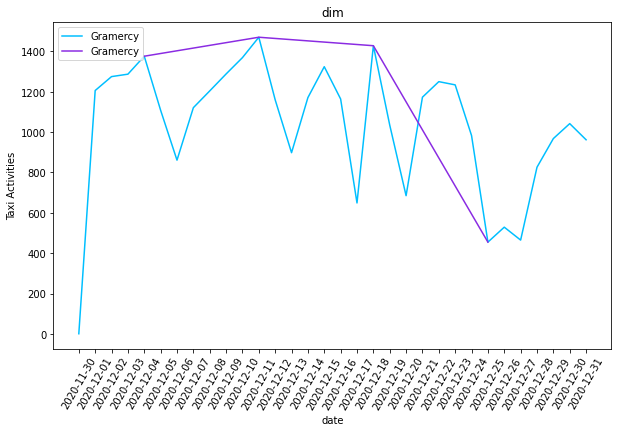

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 赋值 dataframe
data = daily_count_df

data_week = data.copy()

TITLE = 'dim'
Y_LABEL = 'Taxi Activities'
fig = plt.figure(figsize=(10, 6))

colors = ['deepskyblue', 'blueviolet', 'peru', 'brown', 'black', 'red', 'gold', 'darkorange']

DIM_DATE_NAME = 'pickup_date'
DIM_NAME = 'Zone_PU'
MES_CNT_NAME = 'cnt'

dims = all_dims
dims = ['Gramercy']

# 生成周同比数据
stat_week_day_str_list = make_stat_week_day_list('2021-01-01', -1, 7, 16)

if len(stat_week_day_str_list) != 0:
    data_week = data[data.pickup_date.isin(stat_week_day_str_list)]

data_week = data_week.groupby([DIM_DATE_NAME, DIM_NAME])[MES_CNT_NAME].sum()
data_week = data_week.reset_index(name='cnt')

# 绘图
i = 0
for dim in dims:
    subset = data[data.Zone_PU.isin([dim])]
    subset = subset.sort_values(axis=0, by=[DIM_DATE_NAME, DIM_NAME], ascending=True)
    print('-' * 60)
    cnt_zscore = zscore(subset[MES_CNT_NAME])
    subset['cnt_zscore'] = cnt_zscore
    print(subset)
    print('')
    plt.plot(subset[DIM_DATE_NAME], subset[MES_CNT_NAME], c=colors[i], label=dim)
    i = (i + 1) % 8

    subset_week = data_week[data_week.Zone_PU.isin([dim])]
    subset_week = subset_week.sort_values(axis=0, by=[DIM_DATE_NAME, DIM_NAME], ascending=True)
    print('-' * 60)
    cnt_zscore_week = zscore(subset_week[MES_CNT_NAME])
    subset_week['cnt_zscore'] = cnt_zscore_week
    print(subset_week)
    print('')
    plt.plot(subset_week[DIM_DATE_NAME], subset_week[MES_CNT_NAME], c=colors[i], label=dim)
    i = (i + 1) % 8

plt.legend(loc='upper left')
plt.title(TITLE)
plt.ylabel(Y_LABEL)
plt.xlabel('date')
plt.xticks(rotation=60)
plt.show()